In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from util.util import get_root_dir

In [32]:
root_dir = get_root_dir()
proj_dir = root_dir + "/surrogate/plastic_train2/"
df_samples = pd.read_csv(proj_dir + "train2_data/lhs_samples.csv", index_col=0)
df_samples

,Light%,Heavy%
0,0.200000,0.800000
1,0.203015,0.796985
2,0.206030,0.793970
3,0.209045,0.790955
4,0.212060,0.787940
...,...,...
195,0.787940,0.212060
196,0.790955,0.209045
197,0.793970,0.206030
198,0.796985,0.203015


In [33]:
df_outputs = pd.read_csv(proj_dir + "train2_data/result2.csv", header=None)
df_outputs.columns = ["Reflux","Stages","Cond Duty","Reb Duty"]
df_outputs

,Reflux,Stages,Cond Duty,Reb Duty
0,6.441155,25.0,0.130611,0.040227
1,6.338053,25.0,0.130651,0.040233
2,6.237844,25.0,0.130691,0.040240
3,6.140405,25.0,0.130732,0.040247
4,6.045624,25.0,0.130773,0.040255
...,...,...,...,...
195,1.058310,25.0,0.137287,0.040346
196,1.050632,25.0,0.137291,0.040316
197,1.043000,25.0,0.137295,0.040286
198,1.035415,25.0,0.137297,0.040255


In [34]:
def extract_reflux(stage_value):
    # Filter df_samples for specified 'Stages' value and select only "Light%" column
    filtered_data_df = df_samples["Light%"]

    # Convert to numpy array
    filtered_data_np = filtered_data_df.to_numpy().reshape(-1, 1)

    # Initialize an empty list to store the concatenated data
    concatenated_data = []

    # Iterate over the filtered DataFrame
    for idx in filtered_data_df.index:
        # Extract the desired columns (0, 2, 3) from df_outputs
        output_row = df_outputs.loc[idx, df_outputs.columns[[0, 2, 3]]].to_numpy()
        # Concatenate with the row from filtered_data_np
        concatenated_row = np.concatenate((filtered_data_np[filtered_data_df.index.get_loc(idx)].reshape(1, -1), [output_row]), axis=1)
        concatenated_data.append(concatenated_row)

    # Convert the list of arrays into a single numpy array
    arr = np.vstack(concatenated_data)
    arr = arr[np.argsort(arr[:, 1])]
    return arr

s25_data = extract_reflux(25)

In [35]:
print(f"Length of data s50: {len(s25_data)}")

Length of data s50: 200


In [36]:
# Light% , RR, Cond, Reb
s25_data

array([[0.8       , 1.02784001, 0.13729675, 0.04022122],
       [0.796985  , 1.0354148 , 0.13729723, 0.04025524],
       [0.79397   , 1.0430004 , 0.13729461, 0.04028616],
       [0.790955  , 1.05063207, 0.13729123, 0.04031632],
       [0.78794   , 1.05831046, 0.13728711, 0.04034573],
       [0.784925  , 1.06603621, 0.13728224, 0.04037441],
       [0.78191   , 1.07381003, 0.13727665, 0.04040237],
       [0.778894  , 1.08163524, 0.13727034, 0.04042962],
       [0.775879  , 1.08950739, 0.13726333, 0.04045616],
       [0.772864  , 1.0974298 , 0.13725563, 0.04048202],
       [0.769849  , 1.10540325, 0.13724725, 0.04050719],
       [0.766834  , 1.1134285 , 0.1372382 , 0.0405317 ],
       [0.763819  , 1.12150635, 0.13722849, 0.04055556],
       [0.760804  , 1.1296376 , 0.13721814, 0.04057878],
       [0.757789  , 1.13782303, 0.13720716, 0.04060136],
       [0.754774  , 1.1460635 , 0.13719556, 0.04062333],
       [0.751759  , 1.15435984, 0.13718336, 0.0406447 ],
       [0.748744  , 1.16271286,

## 25 stages is chosen to be the nominal condition

RR:  1.32 - 6.28 (re tested)

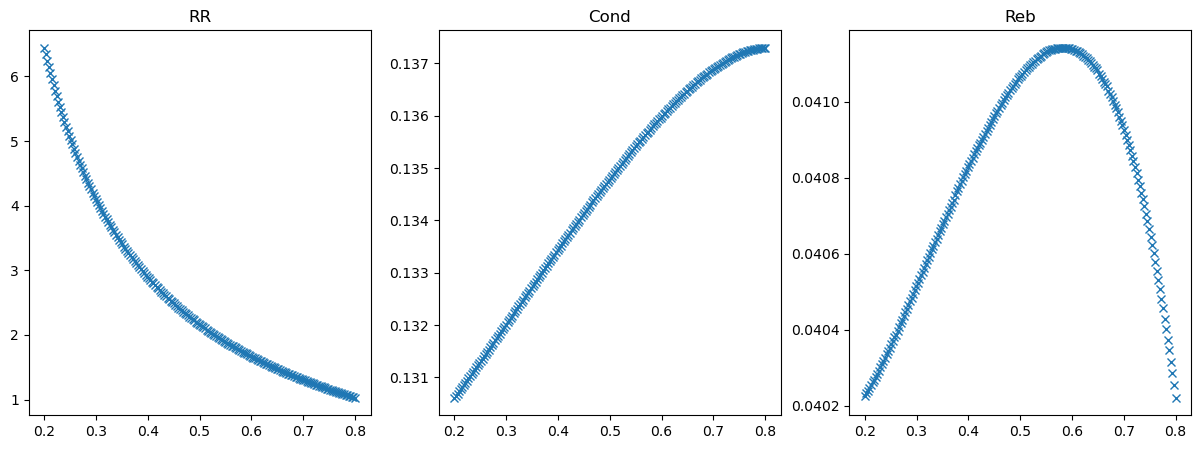

In [37]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
# First plot
axs[0].plot(s25_data.T[0], s25_data.T[1], 'x')
axs[0].set_title('RR')

# Second plot
axs[1].plot(s25_data.T[0], s25_data.T[2], 'x')
axs[1].set_title('Cond')

# Third plot
axs[2].plot(s25_data.T[0], s25_data.T[3], 'x')
axs[2].set_title('Reb')

# Display the plots
plt.show()

In [38]:
coefs1 = np.polyfit(s25_data.T[0], s25_data.T[1], 2)

# Validate
p = np.poly1d(coefs1)
RR_pred = p(s25_data.T[0])

# Calculate SSR and SST
ssr = np.sum((RR_pred - s25_data.T[1]) ** 2)
sst = np.sum((s25_data.T[1] - np.mean(s25_data.T[1])) ** 2)

# Calculate R^2
r_squared = 1 - (ssr / sst)

print("R^2:", r_squared)

coefs1

R^2: 0.9873219833570016


array([ 16.26157662, -23.82416598,   9.95875336])

In [39]:
coefs2 = np.polyfit(s25_data.T[0], s25_data.T[2], 1)

# Validate
p = np.poly1d(coefs2)
RR_pred = p(s25_data.T[0])

# Calculate SSR and SST
ssr = np.sum((RR_pred - s25_data.T[2]) ** 2)
sst = np.sum((s25_data.T[2] - np.mean(s25_data.T[2])) ** 2)

# Calculate R^2
r_squared = 1 - (ssr / sst)

print("R^2:", r_squared)

coefs2

R^2: 0.9842452228155756


array([0.0118844 , 0.12858736])

In [40]:
coefs3 = np.polyfit(s25_data.T[0], s25_data.T[3], 3)

# Validate
p = np.poly1d(coefs3)
RR_pred = p(s25_data.T[0])

# Calculate SSR and SST
ssr = np.sum((RR_pred - s25_data.T[3]) ** 2)
sst = np.sum((s25_data.T[3] - np.mean(s25_data.T[3])) ** 2)

# Calculate R^2
r_squared = 1 - (ssr / sst)

print("R^2:", r_squared)

coefs3

R^2: 0.9987663296045358


array([-0.01938776,  0.01992274, -0.00359448,  0.04031587])